In [1]:
!pip install transformers

In [2]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from tqdm.notebook import tqdm_notebook
tqdm_notebook.pandas()
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from tqdm import tqdm

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
#! cp '/content/drive/My Drive/tweet-sentiment-extraction/preprocessed_train.csv' .
#! cp '/content/drive/My Drive/tweet-sentiment-extraction/preprocessed_test.csv' .
! cp '/content/drive/My Drive/tweet-sentiment-extraction/train.csv' .
! cp '/content/drive/My Drive/tweet-sentiment-extraction/test.csv' .

In [5]:
#train_df = pd.read_csv('preprocessed_train.csv')
#test_df = pd.read_csv('preprocessed_test.csv')
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [6]:
train_df.shape,test_df.shape

((27481, 4), (3534, 3))

In [7]:
train_df.sample(10)

,textID,text,selected_text,sentiment
23099,8f3ce0745c,I AM OFFICIALLY CELEBRATING MY 400TH TWEET. Wo...,Wow! I am so proud Its great.,positive
18082,653eaec42c,my computers broken and I broke my laptop so ...,broken,negative
8563,d05cc52d1a,It`s cold and cloudy and I have a million load...,It`s cold and cloudy and I have a million load...,neutral
11727,ddc208fbff,back in Durango. Chaperoning a party. interest...,interesting.,positive
18752,e5b3f605e0,and welcome to dk #jaoo,welcome to dk #jaoo,positive
21307,0da839bf7c,No news yet,No news yet,neutral
15246,a3df1e8e30,Im am going to send some twits to some folk......,Im am going to send some twits to some folk......,neutral
689,57025d9fd9,Have a great time in London,great,positive
26360,25e6e5c10e,rocks my world!!!! soooo funny!!!! <3,funny!,positive
21984,2d38fc1c25,oh yeah - love his choregoraphy. the pants......,oh yeah - love his choregoraphy. the pants...n...,neutral


In [8]:
test_df.sample(5)

,textID,text,sentiment
1896,846d43bc8f,Musem equaled FAIL!!!!! hall of **** life was ...,negative
2399,9630a8a60e,need some Pizza...can`t get out of office,neutral
967,93b5d1bbea,did you tweet me? i thought i remembered seei...,positive
1485,f6f7382036,@_supernatural_ http://twitpic.com/66l83 - I r...,negative
3061,5d47d76ed3,... sounds like Jeff has the best job in the ...,positive


In [9]:
train_df.isnull().sum(),test_df.isnull().sum()

(textID           0
 text             1
 selected_text    1
 sentiment        0
 dtype: int64, textID       0
 text         0
 sentiment    0
 dtype: int64)

In [10]:
train_df[train_df.text.isna()]

,textID,text,selected_text,sentiment
314,fdb77c3752,NaN,NaN,neutral


In [11]:
train_df.dropna(axis=0,inplace=True)
train_df.shape,test_df.shape

((27480, 4), (3534, 3))

In [12]:
train_df.duplicated().sum(),test_df.duplicated().sum()

(0, 0)

In [13]:
train_df.sample(7)

,textID,text,selected_text,sentiment
10610,567b068131,that`s such a long time from now,that`s such a long time from now,neutral
15730,a34a224f03,Yes! Haha and then when he impaled himself wi...,Haha,positive
17009,17aeaef146,"Going to be buckling down this week. So, relie...",Enjoy,positive
4349,73355afc38,Why I gotta be all that?... I sad now,sad,negative
26133,f606bc09eb,good luck chan! gue kmrn bawa backpack kosong...,good luck chan!,positive
20022,d2905a1a74,Raining in Belfast too - and I promised mysel...,Raining in Belfast too - and I promised myself...,neutral
9548,1b9f7a65c8,"woo! I was at whole earth tonight, maybe tomo...","woo! I was at whole earth tonight, maybe tomor...",neutral


In [14]:
train_df['text'] = train_df['text'].progress_apply(lambda x : str(x).lower())
train_df['selected_text'] = train_df['selected_text'].progress_apply(lambda x : str(x).lower())

In [15]:
#https://www.kaggle.com/cdeotte/tensorflow-roberta-0-705
#Reference notebook for Tokenizing ideas

In [16]:
train_df.sample(10)

,textID,text,selected_text,sentiment
5622,ba7149719f,big hair rock day today me thinks here i go a...,big hair rock day today me thinks here i go a...,neutral
22116,e21e4b55e8,dave i ask you for 'the fix' by jk!!! and sen...,dave i ask you for 'the fix' by jk!!! and send...,neutral
629,7314b068f7,ooo growl and yummy time coming soon for you ...,ooo growl and yummy time coming soon for you t...,neutral
26475,24899d5bc7,is waking up somewhat. go canucks!,is waking up somewhat. go canucks!,neutral
13917,9cbb4b81c8,a huge spider just crawled past me. huge.,a huge spider just crawled past me. huge.,neutral
7287,51910843dc,my bum hurts.,hurts.,negative
3651,5bb98dd30a,i`m miserable with my boredom.,miserable,negative
24094,25586c623d,beer from japan. google it,beer from japan. google it,neutral
4924,bf6db751ef,evaluating my people...dont like this part of ...,dont like this part of the job,negative
3208,9ec935f3c2,cool that`s good. you back on trains for a w...,cool that`s good.,positive


In [17]:
train_df[train_df.text=='']

,textID,text,selected_text,sentiment


In [18]:
from sklearn.model_selection import train_test_split
x_train, x_val , y_train , y_val = train_test_split(train_df[['text','sentiment']],train_df['selected_text'],test_size=0.2, random_state=42)
x_train.shape, x_val.shape , y_train.shape , y_val.shape

((21984, 2), (5496, 2), (21984,), (5496,))

In [19]:
from transformers import RobertaTokenizer
tokenizer = RobertaTokenizer.from_pretrained('roberta-base',add_prefix_space=True)
tokenizer.encode(' hello world'),tokenizer.encode('hello world')

([0, 20760, 232, 2], [0, 20760, 232, 2])

In [20]:
MAX_LEN=128
count = x_train.shape[0]
input_ids = np.zeros((count,MAX_LEN),dtype='int32')
attention_mask = np.zeros((count,MAX_LEN),dtype='int32')
start_tokens = np.zeros((count,MAX_LEN),dtype='int32')
end_tokens = np.zeros((count,MAX_LEN),dtype='int32')

In [21]:
#Understanding tokenizer encode
print(x_train['text'].values[10])
print(x_train['sentiment'].values[10])

v = tokenizer.encode_plus(x_train['text'].values[10],x_train['sentiment'].values[10],add_special_tokens=True,max_length=128,return_attention_mask=True,
                          pad_to_max_length=True,return_tensors='tf',verbose=False)
print(v['input_ids'])
print(v['attention_mask'])

awww the boys have no beards?    i liked their manly man-ness [via ] #asylm
positive
tf.Tensor(
[[    0    10  1401     5  2786    33   117    28  5954   116  1437  1437
   1437   939  6640    49   313   352   313    12  1825   646 11409 27779
    849   281  4360   119     2     2  1313     2     1     1     1     1
      1     1     1     1     1     1     1     1     1     1     1     1
      1     1     1     1     1     1     1     1     1     1     1     1
      1     1     1     1     1     1     1     1     1     1     1     1
      1     1     1     1     1     1     1     1     1     1     1     1
      1     1     1     1     1     1     1     1     1     1     1     1
      1     1     1     1     1     1     1     1     1     1     1     1
      1     1     1     1     1     1     1     1     1     1     1     1
      1     1     1     1     1     1     1     1]], shape=(1, 128), dtype=int32)
tf.Tensor(
[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0

In [22]:
from tqdm import tqdm
for i,each in tqdm(enumerate(x_train.values)):
  val = tokenizer.encode_plus(each[0],each[1],add_special_tokens=True,max_length=128,return_attention_mask=True,pad_to_max_length=True,return_tensors='tf',verbose=False)
  input_ids[i] = val['input_ids']
  attention_mask[i] = val['attention_mask']

21984it [00:08, 2496.82it/s]


In [23]:
# Understanding the concepts of offset and creating start and end tokens
import random
st_tok = np.zeros((1,MAX_LEN),dtype='int32')
end_tok = np.zeros((1,MAX_LEN),dtype='int32')
k  = random.randint(0,x_train.shape[0])
text1 = " "+" ".join(x_train['text'].values[k].split())
text2 = " ".join(y_train.values[k].split())
print(text1)
print(text2)
idx = text1.find(text2)
print(idx)
chars = np.zeros((len(text1)))
chars[idx:idx+len(text2)]=1
if text1[idx-1]==' ':
  chars[idx-1] = 1
print(chars,len(chars))  
enc = tokenizer.encode(text1,add_special_tokens=False)
print(enc)


offsets = []; idx=0
tokens=[]
for t in enc:
  w = tokenizer.decode([t])
  tokens.append(w)
  offsets.append((idx,idx+len(w)))
  idx += len(w)   

print(tokens)
print(offsets)


toks = []
for i,(a,b) in enumerate(offsets):
  sm = np.sum(chars[a:b])
  if sm>0:
    toks.append(i) 
print(toks)

if len(toks)>0:
  st_tok[0,toks[0]+1] = 1
  end_tok[0,toks[-1]+1] = 1 

print('Start tokens',st_tok)
print('End  tokens ',end_tok)

a = np.argmax(st_tok)
b = np.argmax(end_tok)
print(a,b)

text1 = " "+" ".join(x_train['text'].values[k].split())
enc = tokenizer.encode(text1)
st = tokenizer.decode(enc[a:b+1])
print(st)

 star trek was great yet minor details needed to be worked out, but i give it a thumbs up, regardless!
great
15
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.] 102
[999, 18526, 21, 372, 648, 3694, 1254, 956, 7, 28, 1006, 66, 6, 53, 939, 492, 24, 10, 26081, 62, 6, 6069, 328]
[' star', ' trek', ' was', ' great', ' yet', ' minor', ' details', ' needed', ' to', ' be', ' worked', ' out', ',', ' but', ' i', ' give', ' it', ' a', ' thumbs', ' up', ',', ' regardless', '!']
[(0, 5), (5, 10), (10, 14), (14, 20), (20, 24), (24, 30), (30, 38), (38, 45), (45, 48), (48, 51), (51, 58), (58, 62), (62, 63), (63, 67), (67, 69), (69, 74), (74, 77), (77, 79), (79, 86), (86, 89), (89, 90), (90, 101), (101, 102)]
[3]
Start tokens [[0 0 0 0 1 0 0 0 

In [24]:
from tqdm import tqdm
for k in tqdm(range(x_train.shape[0])):
  text1 = " "+" ".join(x_train['text'].values[k].split())
  text2 = " ".join(y_train.values[k].split())
  idx = text1.find(text2)
  chars = np.zeros((len(text1)))
  chars[idx:idx+len(text2)]=1
  if text1[idx-1]==' ':
    chars[idx-1] = 1
  enc = tokenizer.encode(text1,add_special_tokens=False)



  offsets = []; idx=0
  for t in enc:
    w = tokenizer.decode([t])
    offsets.append((idx,idx+len(w)))
    idx += len(w)   

  toks = []
  for i,(a,b) in enumerate(offsets):
    sm = np.sum(chars[a:b])
    if sm>0:
      toks.append(i) 

  if len(toks)>0:
    start_tokens[k,toks[0]+1] = 1
    end_tokens[k,toks[-1]+1] = 1   

100%|██████████| 21984/21984 [00:09<00:00, 2271.47it/s]


In [25]:
#Visualize the results
import random

for _ in range(35,50):
  i = random.randint(0,x_train.shape[0])
  print(x_train.iloc[i]['text'])
  print(y_train.values[i])
  print([tokenizer.decode([x]) for x in tokenizer.encode(x_train.iloc[i]['text'])])
  print('Input ids',input_ids[i])
  print('attention mask',attention_mask[i])
  print('Start tokens',start_tokens[i])
  print('end   Tokens',end_tokens[i])
  a = np.argmax(start_tokens[i])
  b=np.argmax(end_tokens[i])
  print(a,b)
  text1 = " "+" ".join(x_train.iloc[i]['text'].split())
  enc = tokenizer.encode(text1)
  st = tokenizer.decode(enc[a:b+1])
  print(st)
  print('*'*50)

 unfortunately, that`s how it usually goes.  in answer to yesterday...i`m okay. things may be looking up. miss talking to you.
unfortunately,
['<s>', ' unfortunately', ',', ' that', '`', 's', ' how', ' it', ' usually', ' goes', '.', ' ', ' in', ' answer', ' to', ' yesterday', '...', 'i', '`', 'm', ' okay', '.', ' things', ' may', ' be', ' looking', ' up', '.', ' miss', ' talking', ' to', ' you', '.', '</s>']
Input ids [    0  9574     6    14 12905    29   141    24  2333  1411     4  1437
    11  1948     7  2350   734   118 12905   119  8578     4   383   189
    28   546    62     4  2649  1686     7    47     4     2     2  2430
     2     1     1     1     1     1     1     1     1     1     1     1
     1     1     1     1     1     1     1     1     1     1     1     1
     1     1     1     1     1     1     1     1     1     1     1     1
     1     1     1     1     1     1     1     1     1     1     1     1
     1     1     1     1     1     1     1     1     1     1     1 

In [26]:
MAX_LEN=128
count = y_val.shape[0]
input_ids_val = np.zeros((count,MAX_LEN),dtype='int32')
attention_mask_val = np.zeros((count,MAX_LEN),dtype='int32')
start_tokens_val = np.zeros((count,MAX_LEN),dtype='int32')
end_tokens_val = np.zeros((count,MAX_LEN),dtype='int32')

In [27]:
from tqdm import tqdm
for i,each in tqdm(enumerate(x_val.values)):
  val = tokenizer.encode_plus(each[0],each[1],add_special_tokens=True,max_length=128,return_attention_mask=True,pad_to_max_length=True,return_tensors='tf',verbose=False)
  input_ids_val[i] = val['input_ids']
  attention_mask_val[i] = val['attention_mask']

5496it [00:02, 2639.78it/s]


In [28]:
from tqdm import tqdm
for k in tqdm(range(x_val.shape[0])):
  text1 = " "+" ".join(x_val['text'].values[k].split())
  text2 = " ".join(y_val.values[k].split())
  idx = text1.find(text2)
  chars = np.zeros((len(text1)))
  chars[idx:idx+len(text2)]=1
  if text1[idx-1]==' ':
    chars[idx-1] = 1
  enc = tokenizer.encode(text1,add_special_tokens=False)

  offsets = []; idx=0
  for t in enc:
    w = tokenizer.decode([t])
    offsets.append((idx,idx+len(w)))
    idx += len(w)   

  toks = []
  for i,(a,b) in enumerate(offsets):
    sm = np.sum(chars[a:b])
    if sm>0:
      toks.append(i) 

  if len(toks)>0:
    start_tokens_val[k,toks[0]+1] = 1
    end_tokens_val[k,toks[-1]+1] = 1   

100%|██████████| 5496/5496 [00:02<00:00, 2223.01it/s]


In [29]:
#Visualize the results
import random

for _ in range(35,50):
  i = random.randint(0,x_val.shape[0])
  print(x_val.iloc[i]['text'])
  print(y_val.values[i])
  print([tokenizer.decode([x]) for x in tokenizer.encode(x_val.iloc[i]['text'])])
  print('Input ids',input_ids_val[i])
  print('attention mask',attention_mask_val[i])
  print('Start tokens',start_tokens_val[i])
  print('end   Tokens',end_tokens_val[i])
  a = np.argmax(start_tokens_val[i])
  b = np.argmax(end_tokens_val[i])
  print(a,b)
  text1 = " "+" ".join(x_val.iloc[i]['text'].split())
  enc = tokenizer.encode(text1)
  st = tokenizer.decode(enc[a:b+1])
  print(st)
  print('*'*50)

waching gray`s antomy
waching gray`s antomy
['<s>', ' w', 'aching', ' gray', '`', 's', ' ant', 'omy', '</s>']
Input ids [    0   885 13341 12339 12905    29  9876 13604     2     2  7974     2
     1     1     1     1     1     1     1     1     1     1     1     1
     1     1     1     1     1     1     1     1     1     1     1     1
     1     1     1     1     1     1     1     1     1     1     1     1
     1     1     1     1     1     1     1     1     1     1     1     1
     1     1     1     1     1     1     1     1     1     1     1     1
     1     1     1     1     1     1     1     1     1     1     1     1
     1     1     1     1     1     1     1     1     1     1     1     1
     1     1     1     1     1     1     1     1     1     1     1     1
     1     1     1     1     1     1     1     1     1     1     1     1
     1     1     1     1     1     1     1     1]
attention mask [1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0

In [30]:
from transformers import TFRobertaForQuestionAnswering
roberta = TFRobertaForQuestionAnswering.from_pretrained('roberta-base')

Some layers from the model checkpoint at roberta-base were not used when initializing TFRobertaForQuestionAnswering: ['lm_head']
- This IS expected if you are initializing TFRobertaForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing TFRobertaForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFRobertaForQuestionAnswering were not initialized from the model checkpoint at roberta-base and are newly initialized: ['qa_outputs']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [31]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Softmax,Dense,Activation,Dropout,Flatten

In [32]:
input1 = Input(shape=(MAX_LEN,),name='input_id',dtype=tf.int32)
input2 = Input(shape=(MAX_LEN,),name='attention_mask',dtype=tf.int32)
start_scores,end_scores = roberta(input1,attention_mask = input2)
drop1 = Dropout(0.1)(start_scores)
drop1  = tf.expand_dims(drop1,axis=-1)
layer1 = tf.keras.layers.Conv1D(1,1)(drop1)
layer1= Flatten()(layer1)
#dense1 = Dense(units=MAX_LEN,activation='relu',name='dense1',kernel_regularizer = tf.keras.regularizers.L2(l2=0.00001))(start_scores)
softmax1 = Activation('softmax')(layer1)
#dense2 = Dense(units=MAX_LEN,activation='relu',name='dense2',kernel_regularizer = tf.keras.regularizers.L2(l2=0.00001))(end_scores)

drop2 = Dropout(0.1)(end_scores)
drop2  = tf.expand_dims(drop2,axis=-1)
layer2 = tf.keras.layers.Conv1D(1,1)(drop2)
layer2 = Flatten()(layer2)
softmax2 = Activation('softmax')(layer2)

In [33]:
model = Model(inputs=[input1,input2],outputs=[softmax1,softmax2])

In [34]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_id (InputLayer)           [(None, 128)]        0                                            
__________________________________________________________________________________________________
attention_mask (InputLayer)     [(None, 128)]        0                                            
__________________________________________________________________________________________________
tf_roberta_for_question_answeri ((None, 128), (None, 124647170   input_id[0][0]                   
                                                                 attention_mask[0][0]             
__________________________________________________________________________________________________
dropout_37 (Dropout)            (None, 128)          0           tf_roberta_for_questio

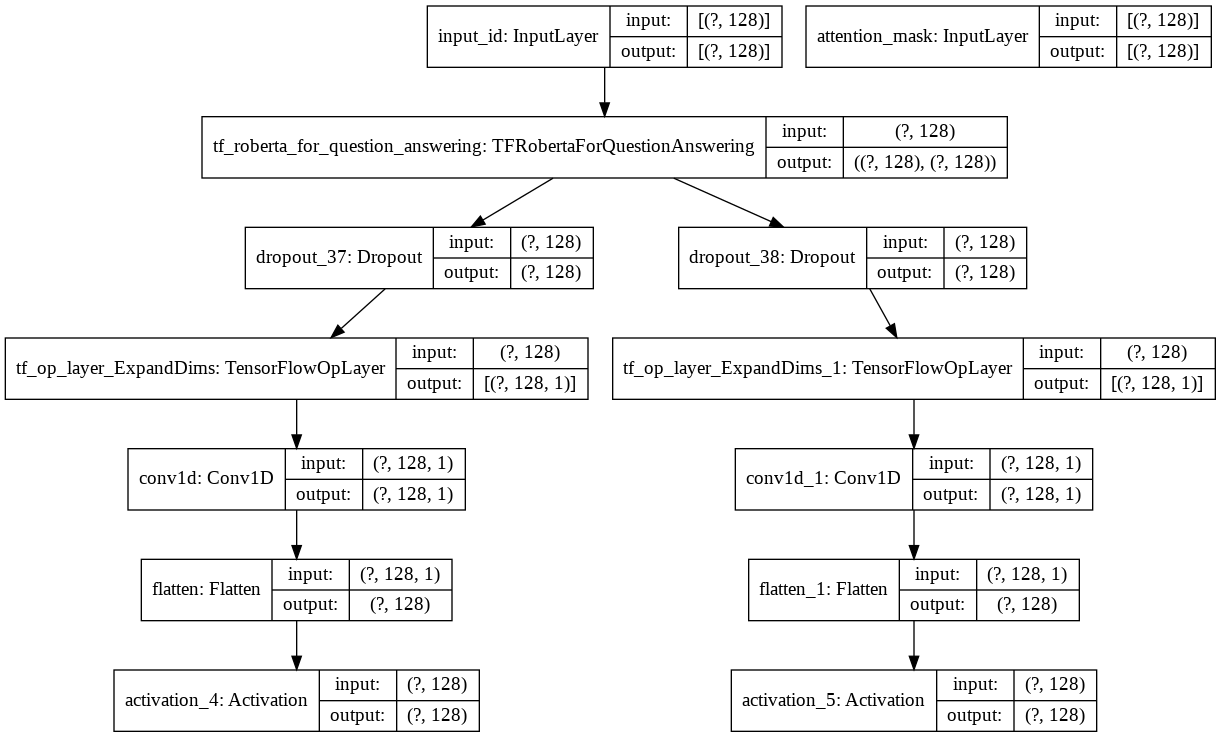

In [35]:
import tensorflow as tf
tf.keras.utils.plot_model(model, 'Model.png',show_shapes=True)

In [36]:
! rm -r '/content/checkpt1'
! rm -r '/content/tensorboard_logs1'

In [37]:
input_data = (input_ids,attention_mask)
output_data = (start_tokens,end_tokens)

val = (input_ids_val,attention_mask_val)
output_val = (start_tokens_val,end_tokens_val)
val_data = (val,output_val)

In [38]:
%load_ext tensorboard
import datetime
import os
#reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1,patience=2,verbose=3,min_lr = 1e-9)
log_dir= os.path.join("tensorboard_logs1" , datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir,histogram_freq=1, write_graph=True)
! mkdir  'checkpt1'
file_path = os.path.join('checkpt1/model_roberta.hdf5')
checkpt_save = tf.keras.callbacks.ModelCheckpoint(filepath=file_path,save_weights_only=True,monitor='val_loss',save_best_only=True,verbose=1)
callbacks=[tensorboard_callback,checkpt_save]

In [39]:
opt = tf.keras.optimizers.Adam(learning_rate=3e-5, epsilon=1e-08, clipnorm=1.0)
model.compile(optimizer=opt,loss='categorical_crossentropy')
train_dataset = tf.data.Dataset.from_tensor_slices((input_data, output_data)).shuffle(buffer_size=1024).batch(32)
val_dataset = tf.data.Dataset.from_tensor_slices(val_data).batch(32)

In [40]:
model.fit(train_dataset,epochs=6,validation_data=val_dataset,callbacks=callbacks)

Epoch 1/6
  1/687 [..............................] - ETA: 0s - loss: 9.4676 - activation_4_loss: 4.6892 - activation_5_loss: 4.7784WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
687/687 [==============================] - ETA: 0s - loss: 3.0323 - activation_4_loss: 1.4031 - activation_5_loss: 1.6292
Epoch 00001: val_loss improved from inf to 1.68423, saving model to checkpt1/model_roberta.hdf5
687/687 [==============================] - 675s 982ms/step - loss: 3.0323 - activation_4_loss: 1.4031 - activation_5_loss: 1.6292 - val_loss: 1.6842 - val_activation_4_loss: 0.8302 - val_activation_5_loss: 0.8540
Epoch 2/6
687/687 [==============================] - ETA: 0s - loss: 2.2938 - activation_4_loss: 1.1433 - activation_5_loss: 1.1505
Epoch 00002: val_loss improv

In [42]:
model.load_weights('/content/checkpt1/model_roberta.hdf5')

**For training data**

In [43]:
start , end = model.predict(input_data)
start.shape,end.shape

((21984, 128), (21984, 128))

In [44]:
pred_values=[]
from tqdm import tqdm
for i in tqdm(range(start.shape[0])):
  a = np.argmax(start[i])
  b = np.argmax(end[i])
  text1 = " "+" ".join(x_train['text'].values[i].split())
  enc = tokenizer.encode(text1)
  val = tokenizer.decode(enc[a:b+1])
  pred_values.append(val)

100%|██████████| 21984/21984 [00:05<00:00, 4376.17it/s]


In [45]:
x_train['pred_text'] = pred_values
x_train['selected_text'] = y_train.values


def jaccard(str1, str2): 
    a = set(str1.lower().split()) 
    b = set(str2.lower().split())
    if (len(a)==0) & (len(b)==0): return 0.5
    c = a.intersection(b)
    return float(len(c)) / (len(a) + len(b) - len(c))

scores=[]
for i in tqdm(range(x_train.shape[0])):
  scores.append(jaccard(x_train['pred_text'].values[i],x_train['selected_text'].values[i]))   

x_train['jaccard']=scores   

100%|██████████| 21984/21984 [00:00<00:00, 106555.12it/s]


In [46]:
x_train.head(4)

,text,sentiment,pred_text,selected_text,jaccard
21209,"oh, he`s hilarious. i`m just commenting on th...",positive,hilarious.,hilarious.,1.000000
18265,"thanks for trying i was hoping bud trillin,...",positive,thanks,"thanks for trying i was hoping bud trillin, ...",0.045455
9684,after show at our house rocked! saying goodbye...,neutral,after show at our house rocked! saying goodby...,after show at our house rocked! saying goodbye...,1.000000
9689,up at 4:30am west coast time..gettin ready to ...,positive,excited,soooo excited to go back to my two fav boyzzzz...,0.083333


In [58]:
print('Mean Jaccard score for training data:',x_train['jaccard'].values.mean())

Mean Jaccard score for training data: 0.7618829188841084


In [47]:
print(x_train[x_train.sentiment=='positive']['jaccard'].values.mean())
print(x_train[x_train.sentiment=='negative']['jaccard'].values.mean())
print(x_train[x_train.sentiment=='neutral']['jaccard'].values.mean())

0.6182823817672941
0.6318373352154292
0.9642739932993936


**For Validation data**


In [48]:
val = (input_ids_val,attention_mask_val)
start_val , end_val = model.predict(val)
start_val.shape,end_val.shape

((5496, 128), (5496, 128))

In [49]:
pred_values_val=[]
from tqdm import tqdm
for i in tqdm(range(start_val.shape[0])):
  a = np.argmax(start_val[i])
  b = np.argmax(end_val[i])
  text1 = " "+" ".join(x_val['text'].values[i].split())
  enc = tokenizer.encode(text1)
  val = tokenizer.decode(enc[a:b+1])
  pred_values_val.append(val)

100%|██████████| 5496/5496 [00:01<00:00, 4360.44it/s]


In [50]:
scores_val=[]
x_val['pred_text'] = pred_values_val
x_val['selected_text'] = y_val.values
scores=[]
for i in tqdm(range(x_val.shape[0])):
  scores_val.append(jaccard(x_val['pred_text'].values[i],x_val['selected_text'].values[i]))

x_val['jaccard']=scores_val  

100%|██████████| 5496/5496 [00:00<00:00, 104193.59it/s]


In [51]:
x_val.sample(20)

,text,sentiment,pred_text,selected_text,jaccard
8280,they raised the prices at work which means peo...,negative,less.,raised the prices,0.000000
10043,it shall be mine!! it shall... be mine!!! *ra...,neutral,it shall be mine!! it shall... be mine!!! *ra...,it shall be mine!! it shall... be mine!!! *rai...,1.000000
17078,what a smashing show tonight! love the killer...,neutral,what a smashing show tonight! love the killer...,what a smashing show tonight! love the killers...,1.000000
283,happy mothers day people. i love my mom a lot ...,positive,happy,happy mothers day people. i love my mom a lot ...,0.090909
26748,i want to panic,neutral,i want to panic,i want to panic,1.000000
12015,my bet on mumbai indians today... anyone to ta...,neutral,my bet on mumbai indians today... anyone to t...,my bet on mumbai indians today... anyone to ta...,1.000000
17584,big header folio (http://bit.ly/mymea has bee...,negative,i`m really impatient,i`m really impatient lol,0.750000
7050,bought awesome shooeessss,positive,awesome,awesome shooeessss,0.500000
10242,says headache http://plurk.com/p/wydaf,negative,headache,headache,1.000000
6701,**** m-audio ie-30s! i just remembered how muc...,neutral,**** m-audio ie-30s! i just remembered how mu...,**** m-audio ie-30s! i just remembered how muc...,1.000000


In [59]:
print('Mean Jaccard score for val data:',x_val['jaccard'].values.mean())

Mean Jaccard score for val data: 0.7009884376335759


In [52]:
print(x_val[x_val.sentiment=='positive']['jaccard'].values.mean())
print(x_val[x_val.sentiment=='negative']['jaccard'].values.mean())
print(x_val[x_val.sentiment=='neutral']['jaccard'].values.mean())

0.5194540529961196
0.5221797725160238
0.9637421329970904


**Error Analysis**

In [53]:
x_val.head()

,text,sentiment,pred_text,selected_text,jaccard
1589,enjoy! family trumps everything,positive,enjoy!,enjoy! family trumps everything,0.250000
10414,--of them kinda turns me off of it all. and ...,negative,turns me off of it all.,kinda turns me off,0.428571
6562,clive it`s my birthday pat me http://apps.fac...,neutral,clive it`s my birthday pat me,clive it`s my birthday pat me,1.000000
2603,congrats hey,positive,congrats,congrats,1.000000
4004,is texting,neutral,is texting,is texting,1.000000


In [54]:
x_val['text_len'] = x_val['text'].progress_apply(lambda x: len(x.split()))
x_val['seltext_len'] = x_val['selected_text'].progress_apply(lambda x: len(x.split()))
x_val['diff'] = x_val['text_len'] - x_val['seltext_len']

In [55]:
x_val.head()

,text,sentiment,pred_text,selected_text,jaccard,text_len,seltext_len,diff
1589,enjoy! family trumps everything,positive,enjoy!,enjoy! family trumps everything,0.250000,4,4,0
10414,--of them kinda turns me off of it all. and ...,negative,turns me off of it all.,kinda turns me off,0.428571,23,4,19
6562,clive it`s my birthday pat me http://apps.fac...,neutral,clive it`s my birthday pat me,clive it`s my birthday pat me,1.000000,7,6,1
2603,congrats hey,positive,congrats,congrats,1.000000,2,1,1
4004,is texting,neutral,is texting,is texting,1.000000,2,2,0


In [56]:
print('Mean & Median values for difference in length of text and selected_text for Neutral:',x_val[x_val.sentiment =='neutral']['diff'].mean(),x_val[x_val.sentiment =='neutral']['diff'].median())
print('Mean & Median values for difference in length of text and selected_text for Positive:',x_val[x_val.sentiment =='positive']['diff'].mean(),x_val[x_val.sentiment =='positive']['diff'].median())
print('Mean & Median values for difference in length of text and selected_text for Negative:',x_val[x_val.sentiment =='negative']['diff'].mean(),x_val[x_val.sentiment =='negative']['diff'].median())

Mean & Median values for difference in length of text and selected_text for Neutral: 0.23971377459749552 0.0
Mean & Median values for difference in length of text and selected_text for Positive: 9.52547393364929 9.0
Mean & Median values for difference in length of text and selected_text for Negative: 9.662213740458014 9.0


In [57]:
print('Mean Jaccard score when difference is less than 5:',x_val[x_val['diff'] <= 5]['jaccard'].mean())
print('Mean Jaccard score when difference is between 5 and 10:',x_val[(x_val['diff'] > 5) & (x_val['diff'] <=10 )]['jaccard'].mean())
print('Mean Jaccard score when difference is greater than 10:',x_val[x_val['diff'] >10 ]['jaccard'].mean())

Mean Jaccard score when difference is less than 5: 0.8216090075732144
Mean Jaccard score when difference is between 5 and 10: 0.5450486615053474
Mean Jaccard score when difference is greater than 10: 0.5059911270103421


**Conclusion**

   - If you calculate the difference between the number of words in the text and selected_text columns for Neutral data, the mean and median
values suggests that there is almost no difference in the no.of words in text and selected_text and the model performs well in this
scenario


   - From the above, the difference between number of words in text and selected_text columns for the Positive and Negative data are around
9.3 and 9.5 , which suggests that as the difference between text and selected_text increases, the model doesn't seem to perform better


  - The model performs well when the **difference** between the no.of words in text and selected_text columns is **small (less than 5)**, the jaccard score is around **0.81**


   - When the difference value increases (greater than 5) , the model performance seems to be dropping as we get a jaccard score of around **0.52** 